## Data Cleaning and Exploratory Data Analysis

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing - lemmatizing, stemming
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

#modelling - countvectorizing, confusion-matrix
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

#creating word cloud
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
#load the final csv file
final = pd.read_csv('final.csv')

In [3]:
#checking the rows and columns in the final file
final.shape

(1815, 3)

In [4]:
#checking for null values
final.isnull().sum()

subreddit     0
title         0
selftext     13
dtype: int64

In [5]:
final.isnull()

,subreddit,title,selftext
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1810,False,False,False
1811,False,False,False
1812,False,False,False
1813,False,False,False


In [6]:
#drop the rows with null values - since there is no way to impute the null values, it's better to drop such rows
final.dropna(inplace=True)

In [7]:
#checking the null values again to recheck there are none
final.isnull().sum()

subreddit    0
title        0
selftext     0
dtype: int64

In [8]:
#classify the subreddits into binary number - 0 indicates Legaladvice and 1 indicates Excel
#this is required because computers require texts to be converted to numbers for any kind of analysis
final['subreddit'] = final['subreddit'].map({'legaladvice': 0, 'excel': 1})

In [9]:
#checking the subreddit column after classification 
final['subreddit'].tail()

1810    1
1811    1
1812    1
1813    1
1814    1
Name: subreddit, dtype: int64

In [10]:
#checking class count
display('class count: ', final.subreddit.value_counts())

'class count: '

0    981
1    821
Name: subreddit, dtype: int64

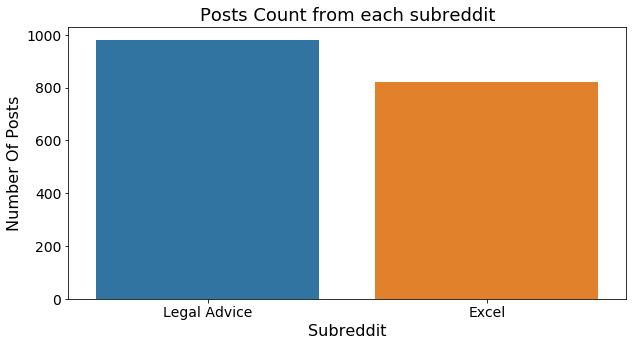

In [11]:
#countplot for subreddit

# Setting the figure size
figure = plt.figure(figsize = (10,5))

# Plotting the graph
sns.countplot(data=final, x = "subreddit")

# Setting graph parameters
plt.title("Posts Count from each subreddit", size = 18)
plt.xlabel("Subreddit", size = 16)
plt.ylabel("Number Of Posts", size = 16)

# # Making sure the only ticks are 0 and 1
plt.xticks(np.arange(2), ["Legal Advice","Excel"],size = 14)
plt.yticks(size = 14);
# plt.xticks(["Excel","Legal Advice"])

Legal Advice subreddit has higher number of posts as compared to excel subreddit. 

In [12]:
#checking class percentage/distribution #baseline accuracy
display('class percentage: ', final.subreddit.value_counts(normalize=True))

'class percentage: '

0    0.544395
1    0.455605
Name: subreddit, dtype: float64

In [13]:
#checking for any data that needs to be cleaned (we find |n and &amp in the title and selftext)
final.head(10)

,subreddit,title,selftext
0,0,2019 Taxes - IRS Free File program now open,"Hey folks, “tax season” is upon us, I wanted t..."
1,0,My sister is wanting my kid after I die,I have always been straight forward and let ev...
2,0,Code bootcamp preys on minorities and tricks t...,TLDR: I got tricked into signing an income sha...
3,0,"Victoria, Australia. Ex employer uses software...",I worked at a business that among many other t...
4,0,[MA] I was just named as the defendant in a la...,This morning I woke up to papers saying that I...
5,0,Bio mom found specific details of closed adoption,NM/USA\n\nI adopted my son about a year ago. H...
6,0,Dad Threatened to call CPS on me.,"Hi, so I’m a 15 year old female who lives in T..."
7,0,My mom died last week and her husband will not...,N.H. My mom died last week and her husband is ...
8,0,New house owners saying we owe them money,We sold a house awhile ago and recently the ne...
9,0,HOA messed up on a property lien because of an...,I am executor of an estate and am currently le...


In [14]:
#checking the selftext column
final.selftext

0       Hey folks, “tax season” is upon us, I wanted t...
1       I have always been straight forward and let ev...
2       TLDR: I got tricked into signing an income sha...
3       I worked at a business that among many other t...
4       This morning I woke up to papers saying that I...
                              ...                        
1810     \n\nHey guys, I don't know a lot about excel ...
1811    Hi guys,\n\ni'm looking for a VB code that can...
1812    I have a column of a few sequential hundred va...
1813    When I open excel it open a single windows but...
1814    I am tasked with displaying the daily change i...
Name: selftext, Length: 1802, dtype: object

In [15]:
#checking the title column 
final.title

0             2019 Taxes - IRS Free File program now open
1                 My sister is wanting my kid after I die
2       Code bootcamp preys on minorities and tricks t...
3       Victoria, Australia. Ex employer uses software...
4       [MA] I was just named as the defendant in a la...
                              ...                        
1810    How do I code a sum function for a coded surve...
1811      copy &amp; paste values using a VB code / Macro
1812    How to Increase all Values in a Column by a Fi...
1813     Excel displaying extra black window in task view
1814    I want to look for a specific word in a table ...
Name: title, Length: 1802, dtype: object

In [16]:
#combining title and posts column into one - to see the classification of both posts and title 
final['combined'] = final['title'] + ' ' + final['selftext']
final['combined']

0       2019 Taxes - IRS Free File program now open He...
1       My sister is wanting my kid after I die I have...
2       Code bootcamp preys on minorities and tricks t...
3       Victoria, Australia. Ex employer uses software...
4       [MA] I was just named as the defendant in a la...
                              ...                        
1810    How do I code a sum function for a coded surve...
1811    copy &amp; paste values using a VB code / Macr...
1812    How to Increase all Values in a Column by a Fi...
1813    Excel displaying extra black window in task vi...
1814    I want to look for a specific word in a table ...
Name: combined, Length: 1802, dtype: object

In [17]:
#checking the rows and columns in the final dataframe
final.shape

(1802, 4)

In [18]:
#checking for null values 
final.isnull().sum()

subreddit    0
title        0
selftext     0
combined     0
dtype: int64

In [19]:
#checking the data types 
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1802 entries, 0 to 1814
Data columns (total 4 columns):
subreddit    1802 non-null int64
title        1802 non-null object
selftext     1802 non-null object
combined     1802 non-null object
dtypes: int64(1), object(3)
memory usage: 150.4+ KB


In [20]:
# Printing the text lengths

lengths = [len(text) for text in final["combined"]]
lengths[:10]

[1112, 3471, 4862, 3675, 2843, 933, 1399, 355, 855, 2024]

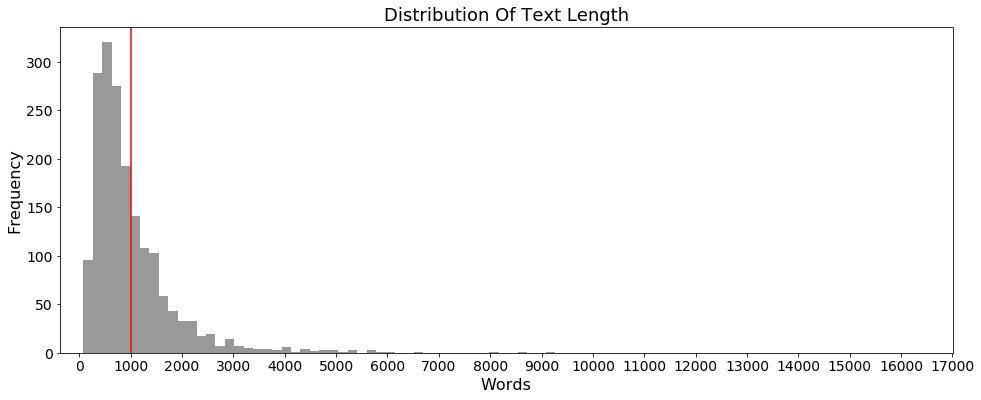

In [21]:
# Generating a list of text lengths

lengths = [len(text) for text in final["combined"]]

# Plotting the text lengths

plt.figure(figsize = (16,6), facecolor = "white")
sns.distplot(lengths, kde = False, bins = 50, color = "black")
plt.axvline(np.mean(lengths), color = "red")
plt.title("Distribution Of Text Length", size = 18)
plt.xlabel("Words", size = 16)
plt.ylabel("Frequency", size = 16)
plt.xticks(np.arange(0,18000,1000), size = 14)
plt.yticks(size = 14);

The above distribution plot shows the length of words in the combined (title & selftext) column. This indicates that there are greater number of combined text rows that have less words (i.e. less lengthy) than combined text rows that are lengthy (with more words). More posts are with less than 1,000 words and less number of posts are with more than 5,000 words. 

In [22]:
# just for my understanding
# for word in tokenizer.tokenize("fishes dogs"):
#     print (lemmatizer.lemmatize(word)) 

In [23]:
# lemmatizer.lemmatize("fishes dogs")
# tokenizer_number = RegexpTokenizer(r'\d+')

In [24]:
# atlanis_text = '6184716a 98509182b 7519406'

In [25]:
# tokenizer_number.tokenize(atlanis_text)

## Preprocessing (Tokenizing and Lemmatizing)

In [26]:
#Lemmatizing - it returns the dictionary form of the word (returned word makes more sense)
# Instantiating the lemmatizier and tokenizer
# The tokenizer will only keep text

lemmatizer = WordNetLemmatizer()
tokenizer  = RegexpTokenizer(r'\w+')

# Setting up the lemmatizer

lemmatized_posts = []

for text in final['combined']:
    tokens = tokenizer.tokenize(text)
    text   = [lemmatizer.lemmatize(text) for text in tokens]
    lemmatized_posts.append(" ".join(text))
    
# Appending the lemmatized posts to the dataframe

final['lemmatized_text'] = lemmatized_posts

# Checking the head of the dataframe

final.head()

,subreddit,title,selftext,combined,lemmatized_text
0,0,2019 Taxes - IRS Free File program now open,"Hey folks, “tax season” is upon us, I wanted t...",2019 Taxes - IRS Free File program now open He...,2019 Taxes IRS Free File program now open Hey ...
1,0,My sister is wanting my kid after I die,I have always been straight forward and let ev...,My sister is wanting my kid after I die I have...,My sister is wanting my kid after I die I have...
2,0,Code bootcamp preys on minorities and tricks t...,TLDR: I got tricked into signing an income sha...,Code bootcamp preys on minorities and tricks t...,Code bootcamp prey on minority and trick them ...
3,0,"Victoria, Australia. Ex employer uses software...",I worked at a business that among many other t...,"Victoria, Australia. Ex employer uses software...",Victoria Australia Ex employer us software I w...
4,0,[MA] I was just named as the defendant in a la...,This morning I woke up to papers saying that I...,[MA] I was just named as the defendant in a la...,MA I wa just named a the defendant in a lawsui...


In [27]:
#replacing certain words in the lemmatized text 
final['lemmatized_text']=final['lemmatized_text'].str.replace(r'&amp|amp','and')
final['lemmatized_text']=final['lemmatized_text'].str.replace('\n','')
final['combined']=final['combined'].str.replace(r'&amp|amp','and')

In [28]:
#checking the first lemmatized text 
final['lemmatized_text'].iloc[1]

'My sister is wanting my kid after I die I have always been straight forward and let everyone know that my son is to go to my best friend when I pas away if he is still underage His dad and that side of the family are absolute trash toxic bigoted racist always the victim entitled jerk My side is mostly old and disabled except for my sister She s in college ha a good job doing well However she s kinda a terrible person She s also extremely introverted and get drained easily My son is 4 and special need I 100 do not think she d be mentally and emotionally equipped to handle him She s saying when I die and Son is still underage she s going to go against my dying wish my want and my very thorough decision of what s best for my son She say she s going to court for kinship if I die or whatever maybe even now What can I do to protect my son He d be best in my best friend s and I ve thought about it for year and it s never changed Thanks everyone for any help that can be provided EDIT Wanted t

In [29]:
#adjusting the width of the column to see the text completely 
pd.options.display.max_colwidth = 200 

In [30]:
final.tail()

,subreddit,title,selftext,combined,lemmatized_text
1810,1,How do I code a sum function for a coded survey with conditional branching questions?,"\n\nHey guys, I don't know a lot about excel so my question might be stupid or poorly phrased but I'll try my best.\n\nSo I have data from a survey. The survey has 14 questions. Each odd number q...","How do I code a sum function for a coded survey with conditional branching questions? \n\nHey guys, I don't know a lot about excel so my question might be stupid or poorly phrased but I'll try my...",How do I code a sum function for a coded survey with conditional branching question Hey guy I don t know a lot about excel so my question might be stupid or poorly phrased but I ll try my best So ...
1811,1,copy &amp; paste values using a VB code / Macro,"Hi guys,\n\ni'm looking for a VB code that can simply copy the value from specific cell (B2) to the cell i am currently on... thank you ! :)\n\nthe point is to have the macro in a keyboard shor...","copy and; paste values using a VB code / Macro Hi guys,\n\ni'm looking for a VB code that can simply copy the value from specific cell (B2) to the cell i am currently on... thank you ! :)\n\nth...",copy and paste value using a VB code Macro Hi guy i m looking for a VB code that can simply copy the value from specific cell B2 to the cell i am currently on thank you the point is to have the ma...
1812,1,How to Increase all Values in a Column by a Fixed Amount?,"I have a column of a few sequential hundred values (ranks for an index) and realized a duplicate 133, which means that everything below it is off by 1 (i.e. imagine 1, 2, 2, 3, 4, 5, 6...). How ca...","How to Increase all Values in a Column by a Fixed Amount? I have a column of a few sequential hundred values (ranks for an index) and realized a duplicate 133, which means that everything below it...",How to Increase all Values in a Column by a Fixed Amount I have a column of a few sequential hundred value rank for an index and realized a duplicate 133 which mean that everything below it is off...
1813,1,Excel displaying extra black window in task view,When I open excel it open a single windows but when I press Win+tab then I see two excel windows on e is normal another is black excel window; if I close either of those excel closes. I tried disa...,Excel displaying extra black window in task view When I open excel it open a single windows but when I press Win+tab then I see two excel windows on e is normal another is black excel window; if I...,Excel displaying extra black window in task view When I open excel it open a single window but when I press Win tab then I see two excel window on e is normal another is black excel window if I cl...
1814,1,I want to look for a specific word in a table and use all instances of that word to VLOOKUP another word within that original set of words and then count how many times that second word occurs. Is...,I am tasked with displaying the daily change in “Issues” from Bim 360 Field. Bim 360 doesn’t show how many issues have been closed each day. As this is construction based I want to show this chang...,I want to look for a specific word in a table and use all instances of that word to VLOOKUP another word within that original set of words and then count how many times that second word occurs. Is...,I want to look for a specific word in a table and use all instance of that word to VLOOKUP another word within that original set of word and then count how many time that second word occurs Is thi...


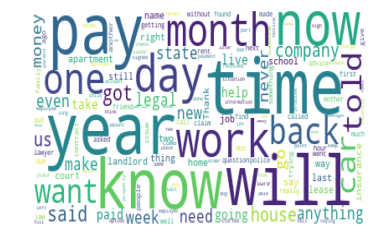

In [31]:
#creating wordcloud

# legaladvice is 0
# Join all titles:
legaladvice = " ".join(review for review in final[final["subreddit"]==0]['combined'])
#Create and generate a word cloud image:
wordcloud_legaladvice = WordCloud(collocations=False,background_color="white", max_words=150).generate(legaladvice)

# Display the generated image:
plt.imshow(wordcloud_legaladvice, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.savefig("legaladvice_word_cloud.png", format="png")
plt.show()

The above wordcloud shows different words that appear in the legaladvice subreddit. The size of the word corresponds to the frequency of the respective word in the posts. For example - time appears more than other words in the legaladvice posts. 

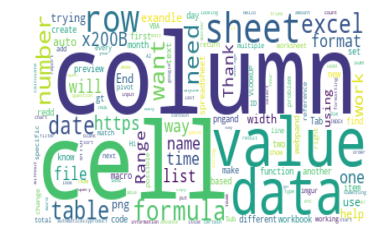

In [32]:
# Excel is 1
# Join all titles:
excel = " ".join(review for review in final[final["subreddit"]==1]['combined'])
#Create and generate a word cloud image:
wordcloud_excel = WordCloud(collocations=False,background_color="white", max_words=150).generate(excel)

# Display the generated image:
plt.imshow(wordcloud_excel, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.savefig("excel_word_cloud.png", format="png")
plt.show()

The above wordcloud shows different words that appear in the excel subreddit. The size of the word corresponds to the frequency of the respective word in the posts. For example - column and cell appears more than other words in the excel posts.

## Modelling and Evaluation

### Splitting the dataset into X and y variables 

In [33]:
#defining the X and y variables 
X = final[["lemmatized_text"]]
y = final["subreddit"]

### Train-test split

In [34]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

### Count Vectorizing the dataframe

In [35]:
# Import CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate our CountVectorizer.
cvec = CountVectorizer(max_features=500, stop_words='english')

### Fitting the CV on training data and transforming it

In [36]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_cvec = pd.DataFrame(cvec.fit_transform(X_train['lemmatized_text']).toarray(),
                           columns = cvec.get_feature_names())
X_train_cvec.head(10)

,00,000,10,100,11,12,15,20,2019,2020,...,worked,worker,working,worksheet,worth,wouldn,write,wrong,x200b,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Transforming the testing data

In [37]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_cvec = pd.DataFrame(cvec.transform(X_test['lemmatized_text']).toarray(),
                          columns = cvec.get_feature_names())

In [38]:
cvec.get_feature_names()

['00',
 '000',
 '10',
 '100',
 '11',
 '12',
 '15',
 '20',
 '2019',
 '2020',
 '25',
 '30',
 '50',
 '500',
 'a1',
 'a2',
 'able',
 'account',
 'action',
 'actually',
 'add',
 'added',
 'address',
 'advance',
 'advice',
 'ago',
 'agreed',
 'agreement',
 'allowed',
 'answer',
 'apartment',
 'application',
 'appreciated',
 'area',
 'array',
 'ask',
 'asked',
 'asking',
 'attorney',
 'auto',
 'automatically',
 'average',
 'away',
 'bad',
 'bank',
 'based',
 'basically',
 'believe',
 'benefit',
 'best',
 'better',
 'bin',
 'bit',
 'blank',
 'bos',
 'bought',
 'box',
 'boyfriend',
 'break',
 'brother',
 'building',
 'business',
 'calculate',
 'california',
 'called',
 'came',
 'car',
 'card',
 'care',
 'case',
 'cat',
 'category',
 'cell',
 'cells',
 'certain',
 'change',
 'changed',
 'charge',
 'chart',
 'check',
 'child',
 'city',
 'claim',
 'class',
 'clear',
 'close',
 'code',
 'column',
 'com',
 'come',
 'coming',
 'comment',
 'company',
 'contact',
 'contains',
 'contract',
 'cop',
 'cop

In [39]:
X_test_cvec

,00,000,10,100,11,12,15,20,2019,2020,...,worked,worker,working,worksheet,worth,wouldn,write,wrong,x200b,year
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,2,0
3,0,0,0,0,0,0,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
449,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y_test.shape

(451,)

### Naives Bayes Model 

In [41]:
#fit a Naives Bayes Model
# Import our model!
from sklearn.naive_bayes import MultinomialNB

In [42]:
# Instantiate our model
nb = MultinomialNB()

In [43]:
# Fit our model!
model = nb.fit(X_train_cvec, y_train)

In [44]:
# Generate our predictions!
predictions = model.predict(X_test_cvec)
predictions

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,

In [45]:
# Score our model on the training set.
model.score(X_train_cvec, y_train)

0.996299037749815

In [46]:
# Score our model on the testing set.
model.score(X_test_cvec, y_test)

0.9955654101995566

In [47]:
#calculating the model coefficients for NB 
model.coef_

array([[ -6.13712692,  -6.8302741 ,  -5.55139999,  -6.10075928,
         -6.48852481,  -6.51519306,  -6.86801443,  -6.11877778,
         -5.71939172,  -6.46254932,  -6.90723514,  -6.79390646,
         -6.66037507,  -7.03506852,  -5.99897658,  -6.10075928,
         -6.04857352,  -6.90723514,  -8.18020082,  -7.48705364,
         -5.49138198,  -6.34192133,  -6.86801443,  -5.98297624,
         -7.48705364,  -8.18020082, -10.12611097, -10.12611097,
         -8.51667306,  -7.56116161, -10.12611097,  -6.59975044,
         -6.21408796,  -7.56116161,  -6.25490996,  -8.18020082,
         -8.73981661,  -7.82352588, -10.12611097,  -5.05720677,
         -5.80862286,  -6.03176641,  -8.51667306,  -8.73981661,
         -9.02749868,  -5.35542634,  -7.08158853,  -8.73981661,
        -10.12611097,  -6.54259203,  -6.62960341,  -6.17486725,
         -7.35352225,  -5.93645623,  -8.3343515 , -10.12611097,
         -6.43723151, -10.12611097,  -6.8302741 , -10.12611097,
         -6.90723514,  -7.41806077,  -5.

In [48]:
#converting model coefficients into a dataframe 
coefficients = pd.DataFrame(model.coef_, columns=cvec.get_feature_names()).T.sort_values(by=0,ascending=True)
coefficients
bottom10 = coefficients.tail(10)
bottom10.columns = ['coef']
bottom10

,coef
number,-4.357790
table,-4.336151
excel,-4.276786
sheet,-4.207217
formula,-4.159964
row,-4.117298
data,-3.827162
cell,-3.827162
value,-3.749384
column,-3.559439


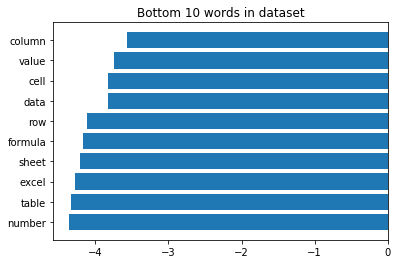

In [49]:
#plotting the horizontal graph for bottom 10 words in my dataframe 
plt.barh(bottom10.index,bottom10['coef']);
plt.title('Bottom 10 words in dataset');

In [50]:
# Import the confusion matrix function.
from sklearn.metrics import confusion_matrix

In [51]:
# Generate a confusion matrix.
confusion_matrix(y_test, predictions)

array([[245,   1],
       [  1, 204]])

In [52]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [53]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 245
False Positives: 1
False Negatives: 1
True Positives: 204


The results indicate that only 2 posts were misclassified. My positive class is 1 which corresponds to excel and negative class is 0 which corresponds to legaladvice. So, only 1 post in excel was misclassified as legaladvice and 1 post in legaladvice was misclassified as an excel post. 

In [54]:
#positive class = excel sorting 
pos_class_prob_sorted = nb.feature_log_prob_[0, :].argsort()

In [55]:
#negative class = legaladvice sorting
neg_class_prob_sorted = nb.feature_log_prob_[1, :].argsort()

In [56]:
#top features in the negative class - legaladvice:0
neg_top_features = np.take(cvec.get_feature_names(), neg_class_prob_sorted)
neg_top_features[:10]

array(['rental', 'insurance', 'brother', 'damage', 'custody', 'kid',
       'court', 'landlord', 'attorney', 'law'], dtype='<U13')

In [57]:
#top features in the positive class - excel :1 
pos_top_features = np.take(cvec.get_feature_names(), pos_class_prob_sorted)
pos_top_features[:10]

array(['sheets', 'workbook', 'select', 'sheet1', 'array', 'width',
       'function', 'cells', 'formula', 'workbooks'], dtype='<U13')

The above cell indicates the top features in my two subreddits. Excel (positive class) has top words such as sheets, workbook, select, sheet1, array and legaladvice subreddit (negative class) has top words such as rental, insurance, brother, damage, custody. 

### Logistic Regression Model

In [58]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

In [59]:
CountVectorizer().fit_transform(X_train['lemmatized_text']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
pipe_params = {
    'cvec__max_features': [500],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__stop_words': ['english']
}
gs = GridSearchCV(pipe, param_grid = pipe_params, cv=5, scoring='roc_auc', verbose=1)
gs.fit(X_train['lemmatized_text'], y_train)
print(gs.best_score_)
gs.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/preetybhogal/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/preetybhogal/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/preetybhogal/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/preetybhogal/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/preetybhogal

0.9995689272441298


/Users/preetybhogal/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'cvec__max_features': 500,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

In [61]:
X_train['lemmatized_text']

763     CO My cousin is filing multiple lawsuit against my parent who were their legal guardian for about 5 year Most if not all of these lawsuit will probably go nowhere but it is taking a mental toll on...
374     GA Drivers license suspended after duo limited permit denied I wa convicted of a duo in January of this year I wa given a form from the judge to take the dmv for a limited driving permit I went to...
1743    Is it possible to use VBA to transpose an entire of column of data into a row a certain amount of cell between every entry I have a dynamic list That start in Sheet1 cell A1 and go down column A I...
454     Can grandmother give custody back to biological parent If parent lost custody of child due to drug use Custody wa then awarded to grandmother because parent were not able to regain custody Lets sa...
1085    From multiple row to a single concatenated cell How can I do this http i imgur com opcBuHd png From multiple row with common vale on the left into a single conc

In [62]:
#Training score
gs.score(X_train['lemmatized_text'], y_train)

1.0

In [63]:
#Testing score
gs.score(X_test['lemmatized_text'], y_test)

0.9981955185405513

In [64]:
#Predicting using X_train
y_train_preds = gs.predict(X_train['lemmatized_text'])
y_train_preds

array([0, 0, 1, ..., 0, 1, 0])

In [65]:
#Predicting using X_test
y_test_preds = gs.predict(X_test['lemmatized_text'])
y_test_preds

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
# Generate a confusion matrix
confusion_matrix(y_test, y_test_preds)

array([[246,   0],
       [  3, 202]])

In [68]:
#generating confusion matrix post logistic regression
tn, fp, fn, tp = confusion_matrix(y_test, y_test_preds).ravel()

In [69]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 246
False Positives: 0
False Negatives: 3
True Positives: 202


The results above indicate that none of the posts in excel were misclassified but 3 posts in legaladvice were misclassified as an excel post. 

### Decision Tree

In [70]:
# Import model.
from sklearn.tree import DecisionTreeClassifier

In [71]:
# Instantiate model.
dt = DecisionTreeClassifier()

In [72]:
#building a pipeline to do countvectorization and using decision tree model
pipe_dt = Pipeline([
    ('cvec', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])
grid = GridSearchCV(pipe_dt,
                   param_grid = {'dt__max_depth' : [3,5,7,10],
                                'dt__min_samples_split' : [5, 10,15,20],
                                'dt__min_samples_leaf' : [2,3,4,5,6,7],
                                'cvec__max_features': [500],
                                'cvec__ngram_range': [(1, 1)]}, cv=5)

In [73]:
#getting the parameters in grid search
grid.get_params()

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator__memory': None,
 'estimator__steps': [('cvec',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                   lowercase=True, max_df=1.0, max_features=None, min_df=1,
                   ngram_range=(1, 1), preprocessor=None, stop_words=None,
                   strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                   tokenizer=None, vocabulary=None)),
  ('dt',
   DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort=False,
                          random_state=None, splitter='best'))],
 'estimator__verbose': F

In [74]:
#building the object for plotting the decision tree 
dt_viz = DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=10, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=2,
                                        min_samples_split=20,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best')
cvec_viz = CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=500, min_df=1, ngram_range=(1, 1),
                                 preprocessor=None, stop_words=None,
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)

In [75]:
X_train_viz = cvec_viz.fit_transform(X_train['lemmatized_text']) #fitting and transforming the lemmatized text into tokens

dt_viz.fit(X_train_viz, y_train) #using the tokenized dataset(CV) to fit the dt model 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
#putting the X_train_viz to visualize after count vectorization
pd.DataFrame(X_train_viz.toarray(), columns=cvec_viz.get_feature_names())

,00,000,10,100,12,15,20,2019,2020,30,...,workbook,workbooks,worked,working,would,wrong,x200b,year,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1,0,0,1,0
1347,0,2,0,0,2,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
1348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,1,0


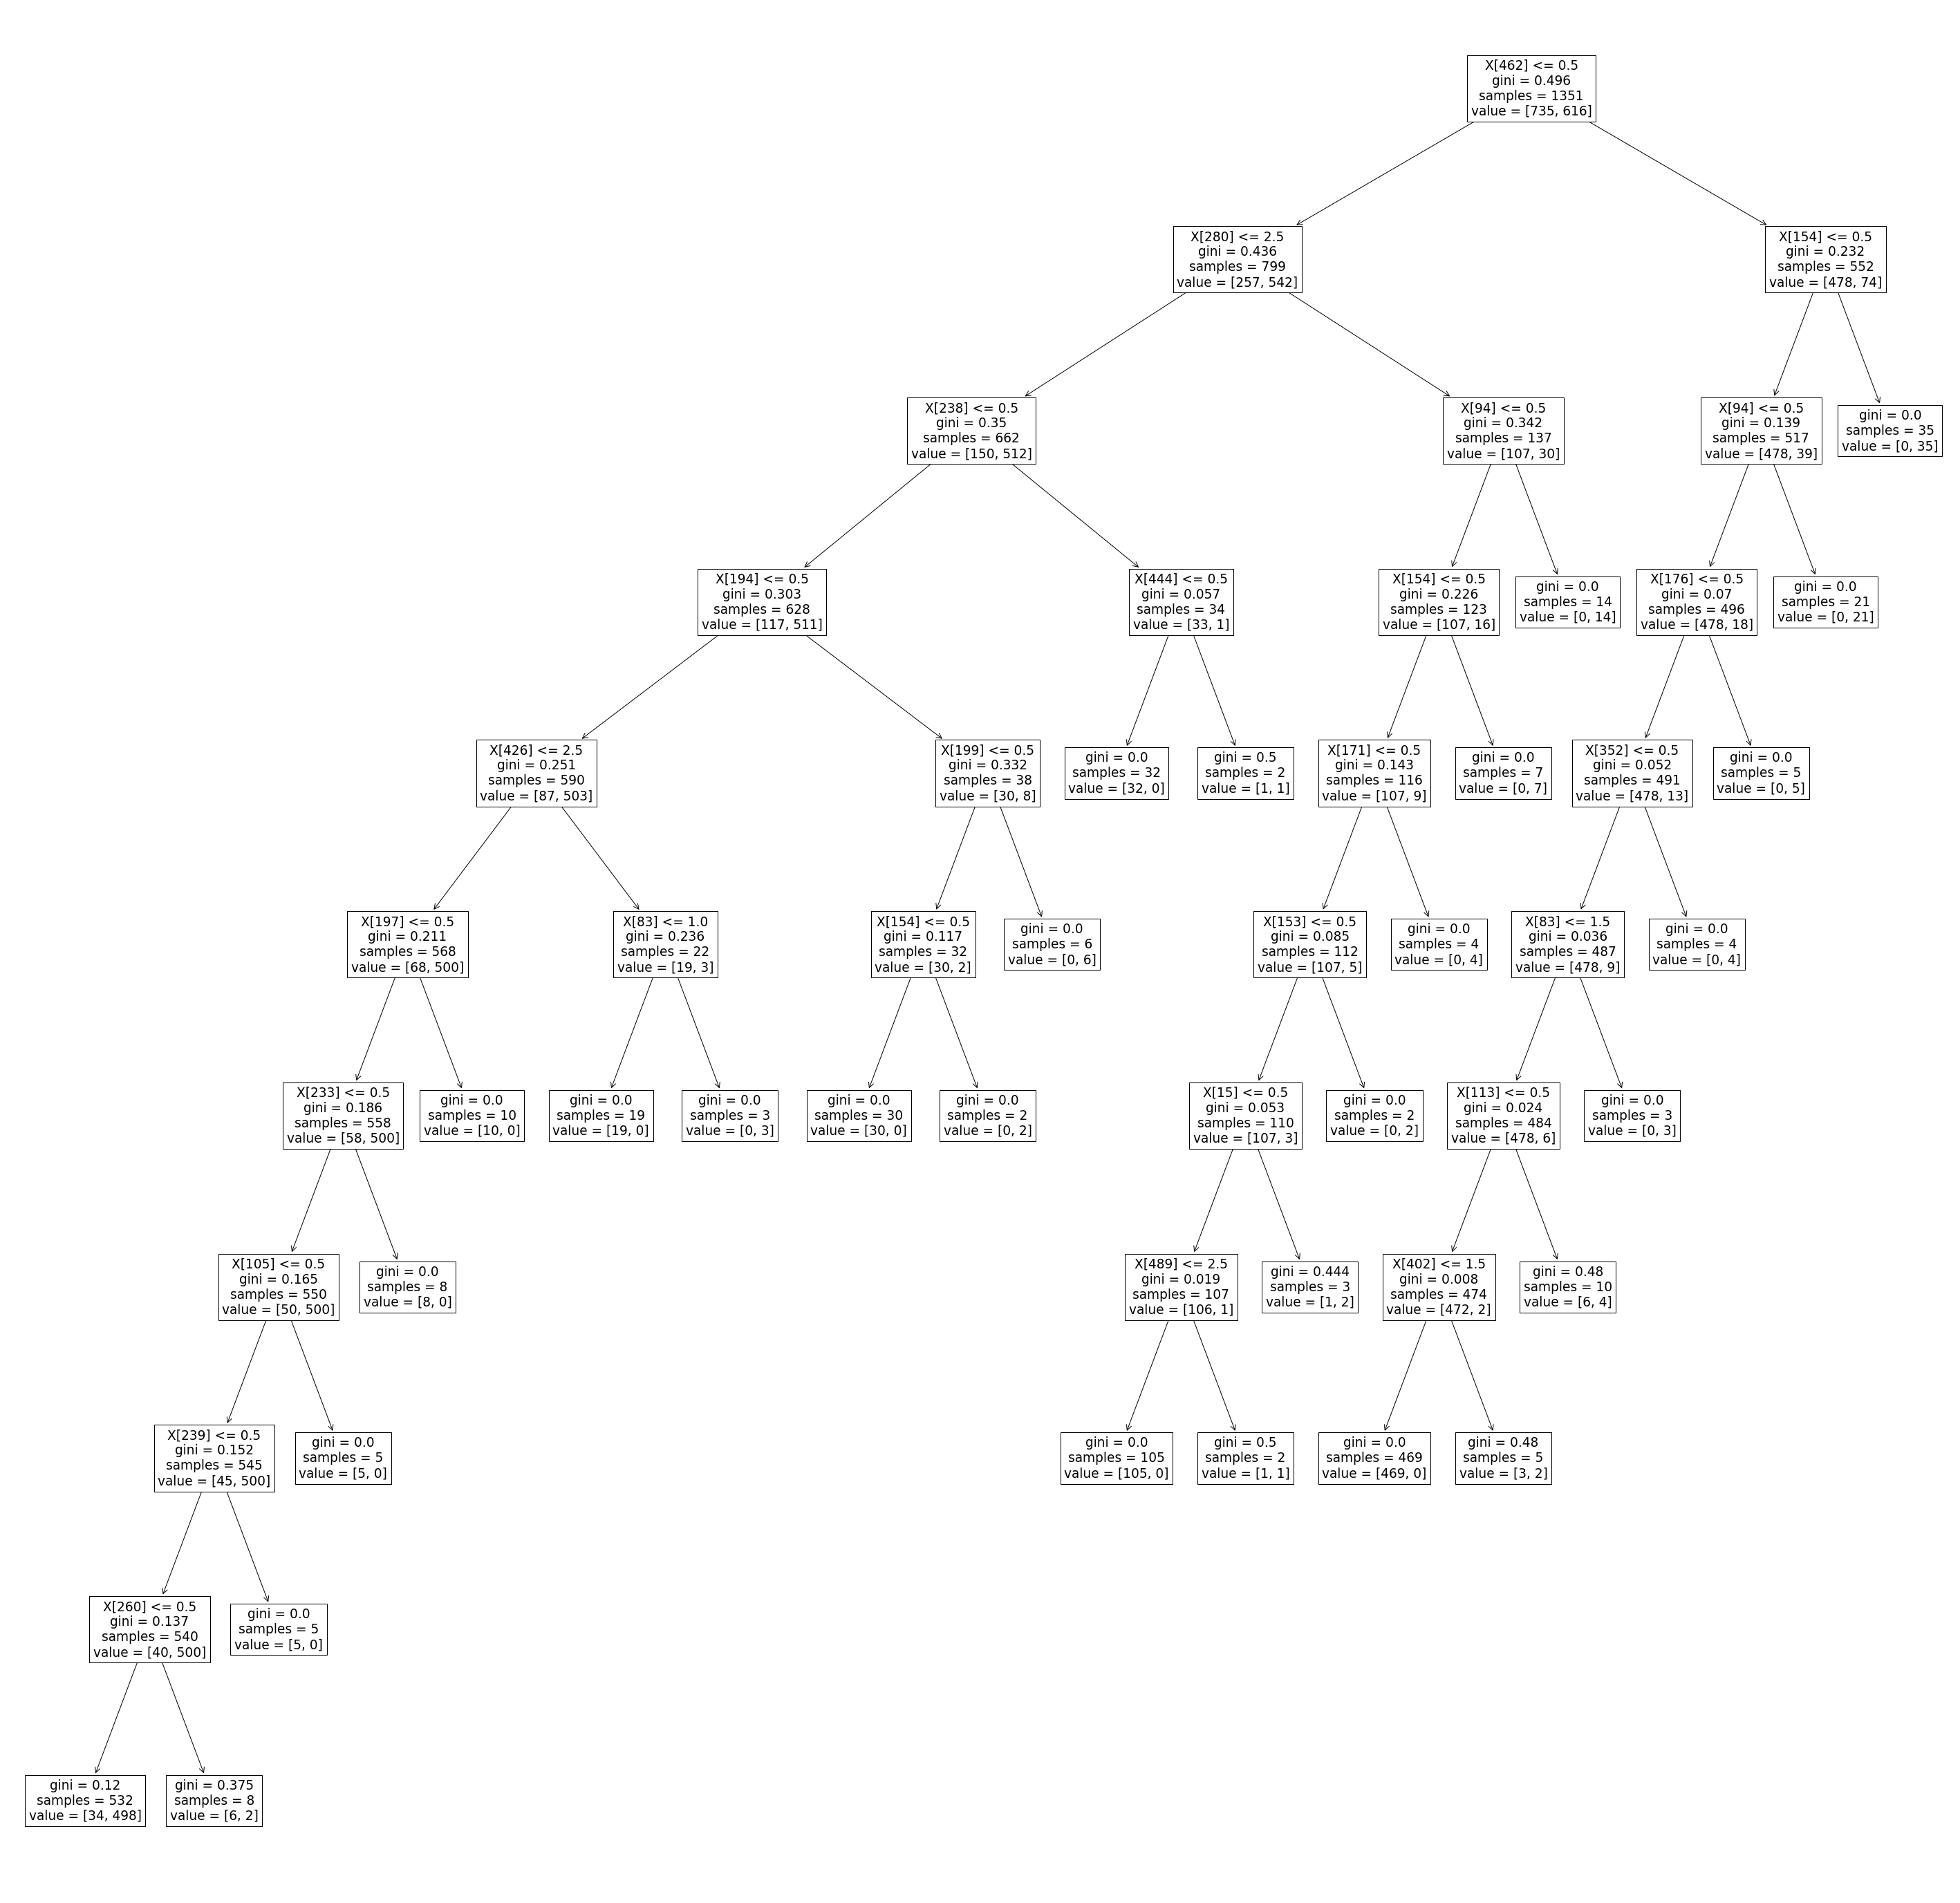

In [77]:
#value here is the value of the y variable - which we are predicting 
from sklearn import tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(50,50)
tree.plot_tree(dt_viz);

In [78]:
#changing the variable name in the decision tree node and plotting it again
from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(dt_viz, out_file=dot_data, feature_names=cvec_viz.get_feature_names())
graph = pydot.graph_from_dot_data(dot_data.getvalue())

/Users/preetybhogal/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [79]:
#saving the decision tree as a pdf 
graph[0].write_pdf('tree.pdf')

In [80]:
import time

# Start our timer.
t0 = time.time()

# Let's GridSearch over the above parameters on our training data.
grid.fit(X_train['lemmatized_text'],y_train)

# Stop our timer and print the result.
print(time.time()-t0)

80.29053092002869


In [81]:
#best estimator in grid search
grid.best_estimator_

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=500, min_df=1, ngram_range=(1, 1),
                                 preprocessor=None, stop_words=None,
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('dt',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=10, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                   

In [82]:
# getting the best parameters of our decision tree
grid.best_params_

{'cvec__max_features': 500,
 'cvec__ngram_range': (1, 1),
 'dt__max_depth': 10,
 'dt__min_samples_leaf': 2,
 'dt__min_samples_split': 20}

In [83]:
# getting the cross-validated score of the above decision tree
grid.best_score_

0.9311621021465581

In [84]:
# Evaluate model
print(f'Score on training set: {grid.score(X_train["lemmatized_text"], y_train)}')
print(f'Score on testing set: {grid.score(X_test["lemmatized_text"], y_test)}')

Score on training set: 0.9666913397483345
Score on testing set: 0.9401330376940134


In [85]:
#Predicting using X_test
y_test_prediction = grid.predict(X_test['lemmatized_text'])
y_test_prediction

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,

In [86]:
# Generate a confusion matrix
confusion_matrix(y_test, y_test_prediction)

array([[229,  17],
       [ 10, 195]])

In [87]:
#generating confusion matrix post logistic regression
tn, fp, fn, tp = confusion_matrix(y_test, y_test_prediction).ravel()

In [88]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 229
False Positives: 17
False Negatives: 10
True Positives: 195


The above result shows that 17 excel posts were misclassified as legaladvice posts and 10 legaladvice posts were misclassified as excel posts. 

### Comparing the three models

|Model|Training Score|Testing Score|
|---|----|----|
|Naives Bayes|0.996299037749815|0.9955654101995566|
|Logistic Regression|1.000000000000000|0.9981955185405513|	
|Decision Tree|0.9666913397483345|0.9356984478935698|

The above table shows that all the three classification models are overfitted on the training set. All the models are not performing well on the test dataset.  

## Conclusion and Recommendation

The data for the subreddits - Excel and Legal Advice was scrapped from the Reddit website. Nearly 1,000 posts were scrapped, cleaned and analyzed for this classification project. A machine learning algorithm was developed to accurately classify the posts and titles from the two subreddits into distinct categories depending on their content. Three classification models namely, Logistic Regression, Naives Bayes, and Decision Tree, were fitted to the cleaned dataset (converted from words into numbers to provide as an input to the computer). A comprison of the results and speciafically the accuracy scores shows that Naives Bayes Model performs the best on the dataset. Only 1 post from the Excel subreddit was misclassified as a Legal Advice post and vice-versa. The accuracy score provided by the model was quite high given that the two subreddits are quite distinct. All of the three models used in the project are overfit and will not perform well on the unseen or new data. The project can be further expanded to include subreddits which are similar and also other classification models can be fitted and some measures such as tuning the hyperparameters can be taken to improve the predictive strength of the model so that it generalizes well. 

Given that the Naives Bayes Model provided the highest accuracy score for our dataset, it is recommended that the Reddit team employs this model because it fitted the dataset slightly better than the other models. However, the above mentioned steps need to be taken to stregthen the model. 